<a href="https://colab.research.google.com/github/MokidiSrinidhi/XAI/blob/main/XAI_ASs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Coefficient (slope): 4.6471
Intercept: 1.5294
Baseline (mean of y): 16.40

Results Table:
   Sales_Visits  New_Connections  Predicted  SHAP_Value  Baseline_plus_SHAP  \
0             2               10  10.823529   -5.576471           10.823529   
1             4               20  20.117647    3.717647           20.117647   
2             3               15  15.470588   -0.929412           15.470588   
3             2               12  10.823529   -5.576471           10.823529   
4             5               25  24.764706    8.364706           24.764706   

  Prediction_Comparison  
0        Overprediction  
1        Overprediction  
2        Overprediction  
3       Underprediction  
4       Underprediction  

Summary Analysis:
Model Accuracy (R²): 0.9842
Trend: More sales visits lead to more new connections.
SHAP Interpretation: SHAP value shows how much the number of visits moves the prediction away from the baseline.


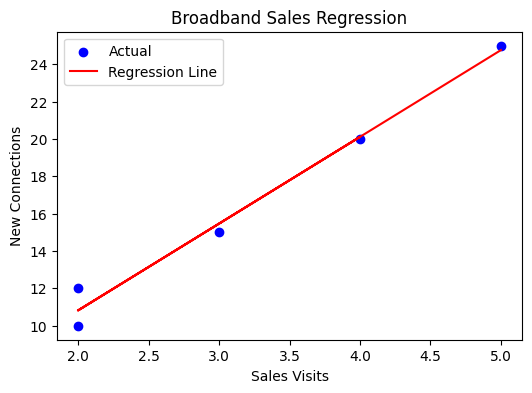

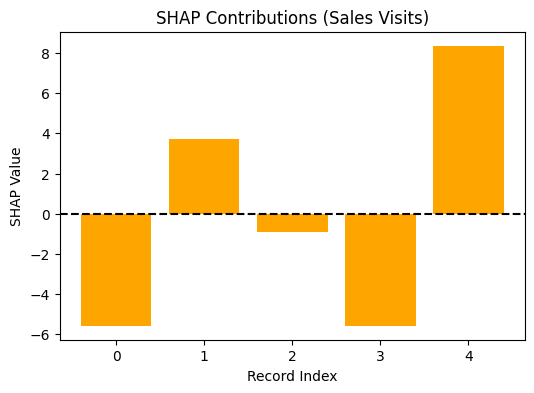

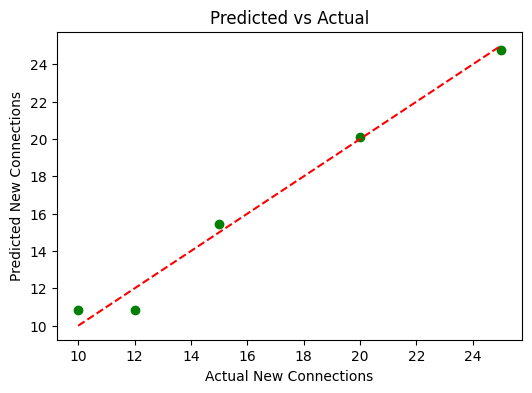

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dataset
data = pd.DataFrame({
    'Sales_Visits': [2, 4, 3, 2, 5],
    'New_Connections': [10, 20, 15, 12, 25]
})

# Independent (X) and Dependent (y) variables
X = data[['Sales_Visits']]
y = data['New_Connections']

# 1. Linear Regression Analysis
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Coefficient (slope): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# 2. Baseline Value
baseline = np.mean(y)
print(f"Baseline (mean of y): {baseline:.2f}")

# 3. Predictions & SHAP values
data['Predicted'] = model.predict(X)
data['SHAP_Value'] = data['Predicted'] - baseline
data['Baseline_plus_SHAP'] = baseline + data['SHAP_Value']

# 4. Over/Under Prediction Check
def compare(row):
    if row['Predicted'] > row['New_Connections']:
        return "Overprediction"
    elif row['Predicted'] < row['New_Connections']:
        return "Underprediction"
    else:
        return "Exact prediction"

data['Prediction_Comparison'] = data.apply(compare, axis=1)

print("\nResults Table:")
print(data)

# 5. Summary Analysis
print("\nSummary Analysis:")
print(f"Model Accuracy (R²): {model.score(X, y):.4f}")
print("Trend: More sales visits lead to more new connections.")
print("SHAP Interpretation: SHAP value shows how much the number of visits moves the prediction away from the baseline.")

# ======== GRAPHS ========

# Regression line
plt.figure(figsize=(6,4))
plt.scatter(data['Sales_Visits'], data['New_Connections'], color='blue', label="Actual")
plt.plot(data['Sales_Visits'], data['Predicted'], color='red', label="Regression Line")
plt.xlabel("Sales Visits")
plt.ylabel("New Connections")
plt.title("Broadband Sales Regression")
plt.legend()
plt.show()

# SHAP value bar chart
plt.figure(figsize=(6,4))
plt.bar(data.index, data['SHAP_Value'], color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Record Index")
plt.ylabel("SHAP Value")
plt.title("SHAP Contributions (Sales Visits)")
plt.show()

# Predicted vs Actual scatter
plt.figure(figsize=(6,4))
plt.scatter(data['New_Connections'], data['Predicted'], color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual New Connections")
plt.ylabel("Predicted New Connections")
plt.title("Predicted vs Actual")
plt.show()
